**Project | Business Case: Automated Customer Reviews**

**Project Goal**
This project aims to develop a product review system powered by NLP models that aggregate customer feedback from different sources. The key tasks include classifying reviews, clustering product categories, and using generative AI to summarize reviews into recommendation articles.

Setup Environment

In [36]:
# Install dependencies
!pip install -q numpy pandas scikit-learn transformers datasets torch matplotlib joblib


Upload Dataset

In [37]:
import os
from pathlib import Path
from google.colab import files

# Define the base directory (e.g., current working directory)
base_dir = Path('./')

# Create the raw data directory if it doesn't exist
raw_data_dir = base_dir / "data/raw"
raw_data_dir.mkdir(parents=True, exist_ok=True)

uploaded = files.upload()  # choose 1429_1.csv.zip

# Move uploaded file to /data/raw
for name in uploaded.keys():
    os.replace(name, raw_data_dir / name)

Saving archive (1).zip to archive (1).zip


Unzip & Preview

In [38]:
import zipfile
import pandas as pd

raw_zip = raw_data_dir / list(uploaded.keys())[0]
extract_dir = base_dir / "data/raw/extracted"
extract_dir.mkdir(exist_ok=True)

with zipfile.ZipFile(raw_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Find first CSV file and preview
csv_files = list(extract_dir.glob("*.csv"))
df = pd.read_csv(csv_files[0], low_memory=False)


Analyze the Data

In [39]:
df.head(5)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [40]:
df.tail(5)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
28327,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",...,NaN,True,NaN,0.0,5,http://reviews.bestbuy.com/3545/5620410/review...,I got 2 of these for my 8 yr old twins. My 11 ...,Xmas gift,Mom2twinsplus1,http://reviews.bestbuy.com/3545/5620410/review...
28328,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",...,NaN,True,NaN,0.0,4,http://reviews.bestbuy.com/3545/5620410/review...,I bought this for my niece for a Christmas gif...,yes it is a great tablet.,fireman21,http://reviews.bestbuy.com/3545/5620410/review...
28329,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",...,NaN,True,NaN,0.0,5,http://reviews.bestbuy.com/3545/5620410/review...,"Very nice for light internet browsing, keeping...",You get a lot for the price!,suzannalicious,http://reviews.bestbuy.com/3545/5620410/review...
28330,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",...,NaN,True,NaN,0.0,5,http://reviews.bestbuy.com/3545/5620410/review...,This Tablet does absolutely everything I want!...,You get the entire World for less than $100!,SandyJ,http://reviews.bestbuy.com/3545/5620410/review...
28331,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",...,NaN,True,NaN,0.0,4,http://reviews.bestbuy.com/3545/5620410/review...,"At ninety dollars, the expectionations are low...",You get what your paying for,Hung,http://reviews.bestbuy.com/3545/5620410/review...


In [41]:
df.columns

Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs'],
      dtype='object')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   28332 non-null  object 
 1   dateAdded            28332 non-null  object 
 2   dateUpdated          28332 non-null  object 
 3   name                 28332 non-null  object 
 4   asins                28332 non-null  object 
 5   brand                28332 non-null  object 
 6   categories           28332 non-null  object 
 7   primaryCategories    28332 non-null  object 
 8   imageURLs            28332 non-null  object 
 9   keys                 28332 non-null  object 
 10  manufacturer         28332 non-null  object 
 11  manufacturerNumber   28332 non-null  object 
 12  reviews.date         28332 non-null  object 
 13  reviews.dateSeen     28332 non-null  object 
 14  reviews.didPurchase  9 non-null      object 
 15  reviews.doRecommend  16086 non-null 

In [43]:
df.describe()

,reviews.id,reviews.numHelpful,reviews.rating
count,4.100000e+01,16115.000000,28332.000000
mean,1.840066e+08,0.529321,4.514048
std,2.337036e+07,9.345017,0.934957
min,1.116244e+08,0.000000,1.000000
25%,1.843344e+08,0.000000,4.000000
50%,1.885078e+08,0.000000,5.000000
75%,1.988160e+08,0.000000,5.000000
max,2.085304e+08,621.000000,5.000000


Check for Missing Values

In [44]:
df.isnull().sum().sort_values(ascending=False).head(10)

,0
reviews.didPurchase,28323
reviews.id,28291
reviews.doRecommend,12246
reviews.numHelpful,12217
reviews.username,5
id,0
dateUpdated,0
dateAdded,0
primaryCategories,0
categories,0


Maintain Only Necessary Columns

In [45]:
# MAINTAIN THE COLUMNS THAT WE WANT.
df_fewcolumns = df[['id', 'name', 'asins', 'brand', 'categories', 'reviews.doRecommend',
       'reviews.numHelpful', 'reviews.rating',
       'reviews.text', 'reviews.title', ]]

In [46]:
df_fewcolumns

,id,name,asins,brand,categories,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,reviews.title
0,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",NaN,NaN,3,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...
1,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",NaN,NaN,4,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...
2,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",NaN,NaN,5,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...
3,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",NaN,NaN,5,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...
4,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",NaN,NaN,5,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...
...,...,...,...,...,...,...,...,...,...,...
28327,AVqkIhxunnc1JgDc3kg_,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",True,0.0,5,I got 2 of these for my 8 yr old twins. My 11 ...,Xmas gift
28328,AVqkIhxunnc1JgDc3kg_,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",True,0.0,4,I bought this for my niece for a Christmas gif...,yes it is a great tablet.
28329,AVqkIhxunnc1JgDc3kg_,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",True,0.0,5,"Very nice for light internet browsing, keeping...",You get a lot for the price!
28330,AVqkIhxunnc1JgDc3kg_,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",True,0.0,5,This Tablet does absolutely everything I want!...,You get the entire World for less than $100!


Check Data Distribution

/tmp/ipython-input-3262208330.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fewcolumns['sentiment_class'] = df_fewcolumns['reviews.rating'].apply(categorize_sentiment)


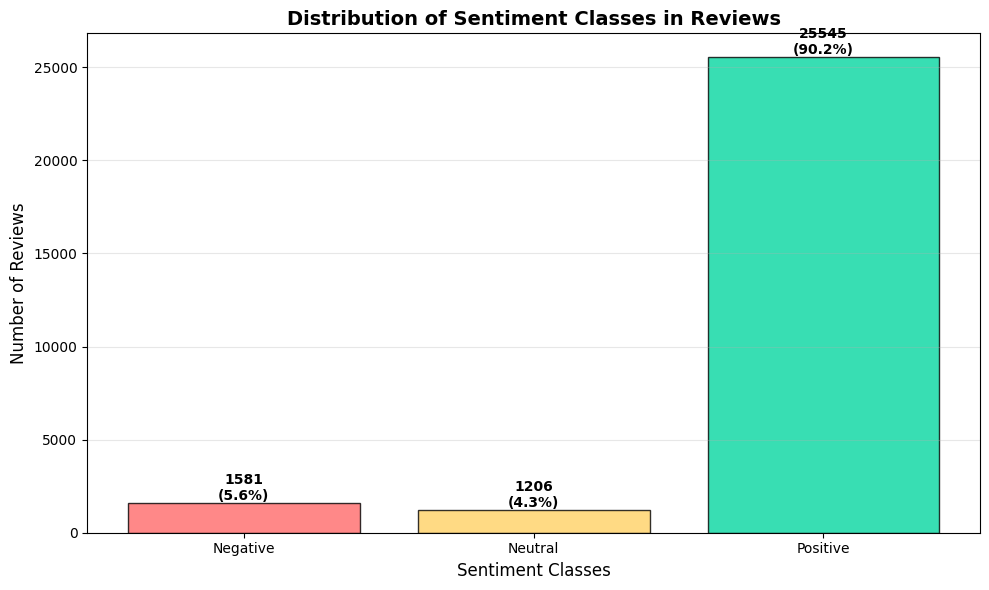


SENTIMENT DISTRIBUTION ANALYSIS
Total reviews: 28,332

Detailed breakdown:
Negative:  1,581 reviews (  5.6%)
Neutral :  1,206 reviews (  4.3%)
Positive: 25,545 reviews ( 90.2%)

Original rating distribution:
Rating 1 (Negative):    965 reviews (  3.4%)
Rating 2 (Negative):    616 reviews (  2.2%)
Rating 3 (Neutral ):  1,206 reviews (  4.3%)
Rating 4 (Positive):  5,648 reviews ( 19.9%)
Rating 5 (Positive): 19,897 reviews ( 70.2%)


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



# Function to categorize sentiment
def categorize_sentiment(rating):
    if rating in [1, 2]:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    elif rating in [4, 5]:
        return 'Positive'

# Apply categorization
df_fewcolumns['sentiment_class'] = df_fewcolumns['reviews.rating'].apply(categorize_sentiment)

# Count occurrences of each class
class_counts = df_fewcolumns['sentiment_class'].value_counts()

# Reorder to have consistent order: Negative, Neutral, Positive
class_counts = class_counts.reindex(['Negative', 'Neutral', 'Positive'])

# Create histogram
plt.figure(figsize=(10, 6))
colors = ['#ff6b6b', '#ffd166', '#06d6a0']  # red, yellow, green
bars = plt.bar(class_counts.index, class_counts.values, color=colors, alpha=0.8, edgecolor='black')

# Add count labels on bars
for bar, count in zip(bars, class_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
             f'{count}\n({count/len(df_fewcolumns)*100:.1f}%)', # Corrected len(df) to len(df_fewcolumns)
             ha='center', va='bottom', fontweight='bold')

plt.title('Distribution of Sentiment Classes in Reviews', fontsize=14, fontweight='bold')
plt.xlabel('Sentiment Classes', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Display the plot
plt.tight_layout()
plt.show()

# Print detailed statistics
print("\n" + "="*50)
print("SENTIMENT DISTRIBUTION ANALYSIS")
print("="*50)
print(f"Total reviews: {len(df_fewcolumns):,}") # Corrected len(df) to len(df_fewcolumns)
print("\nDetailed breakdown:")
for cls in ['Negative', 'Neutral', 'Positive']:
    count = class_counts.get(cls, 0) # Use .get() for robustness
    percentage = (count / len(df_fewcolumns)) * 100 # Corrected len(df) to len(df_fewcolumns)
    print(f"{cls:8}: {count:>6,} reviews ({percentage:5.1f}%)")

print("\nOriginal rating distribution:")
rating_counts = df_fewcolumns['reviews.rating'].value_counts().sort_index() # Corrected syntax and df variable
for rating in range(1, 6):
    count = rating_counts.get(rating, 0) # Use .get() for robustness
    percentage = (count / len(df_fewcolumns)) * 100 # Corrected len(df) to len(df_fewcolumns)
    sentiment = categorize_sentiment(rating)
    print(f"Rating {rating} ({sentiment:8}): {count:>6,} reviews ({percentage:5.1f}%)")

Calculate Class Weights due to Imbalance

In [48]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np # Import numpy

classes = ['Negative', 'Neutral', 'Positive']
# Filter out NaN values from the sentiment_class column before computing weights
y_filtered = df_fewcolumns['sentiment_class'].dropna()
weights = compute_class_weight('balanced', classes=np.array(classes), y=y_filtered)
class_weights = dict(zip(classes, weights))
print(class_weights)

{'Negative': np.float64(5.9734345351043645), 'Neutral': np.float64(7.830845771144278), 'Positive': np.float64(0.3697005284791544)}


**Train Weighted Baseline Model (TF-IDF + Logistic Regression)**

Setup

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC

Split the Dataset (Stratified)

In [50]:
# Drop rows with NaN values in 'reviews.text' or 'sentiment_class' before splitting
df_filtered = df_fewcolumns.dropna(subset=["reviews.text", "sentiment_class"])

X_train, X_test, y_train, y_test = train_test_split(
    df_filtered["reviews.text"],
    df_filtered["sentiment_class"],
    test_size=0.15,
    random_state=42,
    stratify=df_filtered["sentiment_class"]
)

Use Class Weights

In [51]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
classes = ['Negative', 'Neutral', 'Positive']
y_filtered = df_fewcolumns['sentiment_class'].dropna()
weights = compute_class_weight('balanced', classes=np.array(classes), y=y_filtered)
class_weights = dict(zip(classes, weights))
print(class_weights)

{'Negative': np.float64(5.9734345351043645), 'Neutral': np.float64(7.830845771144278), 'Positive': np.float64(0.3697005284791544)}


**Build & Train the Weighted Model - Baseline**

In [52]:
pipe = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=50000, ngram_range=(1,2))),
    ('clf', LogisticRegression(max_iter=2000, class_weight=class_weights))
])

pipe.fit(X_train, y_train)


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=50000, ngram_range=(1, 2))),
                ('clf',
                 LogisticRegression(class_weight={'Negative': np.float64(5.9734345351043645),
                                                  'Neutral': np.float64(7.830845771144278),
                                                  'Positive': np.float64(0.3697005284791544)},
                                    max_iter=2000))])

Save the Model

In [53]:
import joblib
joblib.dump(pipe, "baseline_tfidf_weighted.joblib")
print("✅ Model saved → baseline_tfidf_weighted.joblib")

✅ Model saved → baseline_tfidf_weighted.joblib


Evaluate the Model


Classification Report:

              precision    recall  f1-score   support

    Negative      0.696     0.823     0.754       237
     Neutral      0.414     0.702     0.520       181
    Positive      0.987     0.944     0.965      3832

    accuracy                          0.927      4250
   macro avg      0.699     0.823     0.747      4250
weighted avg      0.947     0.927     0.934      4250



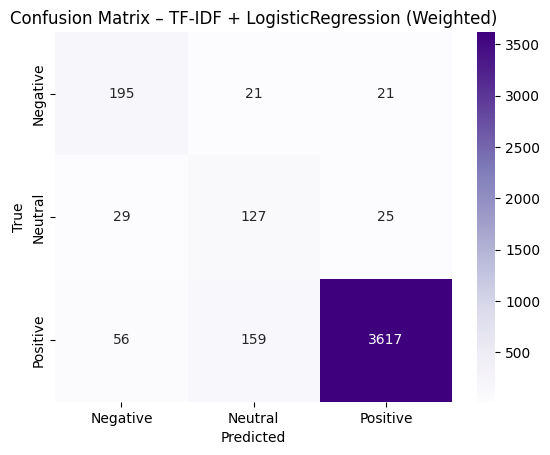

In [54]:
y_pred = pipe.predict(X_test)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, digits=3))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix – TF-IDF + LogisticRegression (Weighted)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Testing with SVM instead

**Changing Model to SVM**

In [55]:
pipe = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=50000, ngram_range=(1,2))),
    ('svm', LinearSVC(class_weight=class_weights))
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=50000, ngram_range=(1, 2))),
                ('svm',
                 LinearSVC(class_weight={'Negative': np.float64(5.9734345351043645),
                                         'Neutral': np.float64(7.830845771144278),
                                         'Positive': np.float64(0.3697005284791544)}))])

Save the Model

In [56]:
import joblib
joblib.dump(pipe, "svm_tfidf_weighted.joblib")
print("✅ Model saved → svm_tfidf_weighted.joblib")


✅ Model saved → svm_tfidf_weighted.joblib


Evaluate the Model


Classification Report:
              precision    recall  f1-score   support

    Negative      0.856     0.755     0.803       237
     Neutral      0.699     0.602     0.647       181
    Positive      0.977     0.990     0.984      3832

    accuracy                          0.961      4250
   macro avg      0.844     0.783     0.811      4250
weighted avg      0.958     0.961     0.959      4250



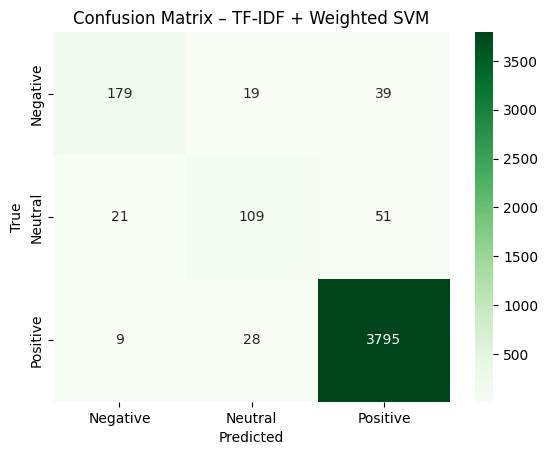

In [57]:
y_pred = pipe.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=3))

cm = confusion_matrix(y_test, y_pred, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix – TF-IDF + Weighted SVM")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


**Goal: Compare TF-IDF + LogisticRegression vs TF-IDF + SVM**

Load Both Models

In [58]:
import joblib

logreg_model = joblib.load("baseline_tfidf_weighted.joblib")
svm_model     = joblib.load("svm_tfidf_weighted.joblib")


Generate Predictions on the Same Test Set

In [59]:
y_pred_logreg = logreg_model.predict(X_test)
y_pred_svm    = svm_model.predict(X_test)


Compute Evaluation Metrics

In [60]:
from sklearn.metrics import classification_report

print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_logreg, digits=3))

print("=== SVM ===")
print(classification_report(y_test, y_pred_svm, digits=3))


=== Logistic Regression ===
              precision    recall  f1-score   support

    Negative      0.696     0.823     0.754       237
     Neutral      0.414     0.702     0.520       181
    Positive      0.987     0.944     0.965      3832

    accuracy                          0.927      4250
   macro avg      0.699     0.823     0.747      4250
weighted avg      0.947     0.927     0.934      4250

=== SVM ===
              precision    recall  f1-score   support

    Negative      0.856     0.755     0.803       237
     Neutral      0.699     0.602     0.647       181
    Positive      0.977     0.990     0.984      3832

    accuracy                          0.961      4250
   macro avg      0.844     0.783     0.811      4250
weighted avg      0.958     0.961     0.959      4250



Visual Comparison

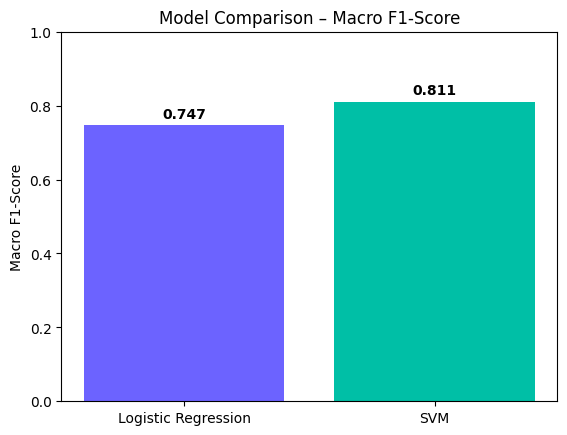

In [61]:
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import numpy as np

f1_logreg_macro = f1_score(y_test, y_pred_logreg, average='macro')
f1_svm_macro    = f1_score(y_test, y_pred_svm, average='macro')

scores = {
    'Logistic Regression': f1_logreg_macro,
    'SVM': f1_svm_macro
}

plt.bar(scores.keys(), scores.values(), color=['#6C63FF','#00BFA6'])
plt.title("Model Comparison – Macro F1-Score")
plt.ylabel("Macro F1-Score")
plt.ylim(0,1)
for model, val in scores.items():
    plt.text(model, val+0.02, f"{val:.3f}", ha='center', fontweight='bold')
plt.show()


Compare Confusion Matrices

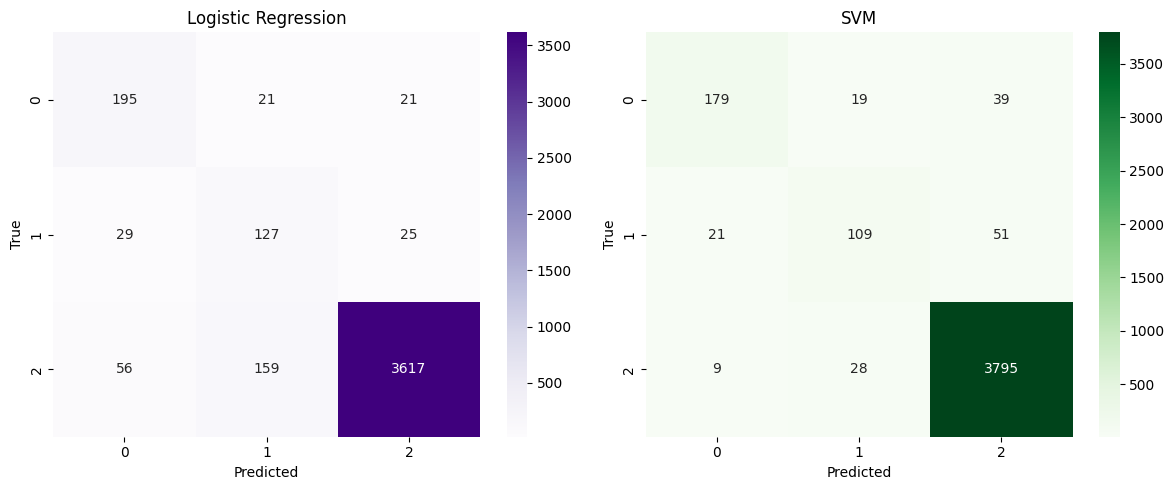

In [62]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

classes = ['Negative', 'Neutral', 'Positive']

fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg, labels=classes),
            annot=True, fmt='d', cmap='Purples', ax=axes[0])
axes[0].set_title('Logistic Regression')

sns.heatmap(confusion_matrix(y_test, y_pred_svm, labels=classes),
            annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('SVM')

for ax in axes:
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")
plt.tight_layout()
plt.show()


Model Comparison — Logistic Regression vs SVM (with Accuracy)

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Generate predictions
y_pred_logreg = logreg_model.predict(X_test)
y_pred_svm    = svm_model.predict(X_test)

# ✅ Calculate metrics
metrics = {
    "Model": ["Logistic Regression", "SVM"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_logreg),
        accuracy_score(y_test, y_pred_svm)
    ],
    "Macro F1": [
        f1_score(y_test, y_pred_logreg, average='macro'),
        f1_score(y_test, y_pred_svm, average='macro')
    ],
    "Weighted F1": [
        f1_score(y_test, y_pred_logreg, average='weighted'),
        f1_score(y_test, y_pred_svm, average='weighted')
    ],
    "Precision (Macro)": [
        precision_score(y_test, y_pred_logreg, average='macro'),
        precision_score(y_test, y_pred_svm, average='macro')
    ],
    "Recall (Macro)": [
        recall_score(y_test, y_pred_logreg, average='macro'),
        recall_score(y_test, y_pred_svm, average='macro')
    ]
}

import pandas as pd
results_df = pd.DataFrame(metrics)
display(results_df.round(3))


,Model,Accuracy,Macro F1,Weighted F1,Precision (Macro),Recall (Macro)
0,Logistic Regression,0.927,0.747,0.934,0.699,0.823
1,SVM,0.961,0.811,0.959,0.844,0.783


Bar Chart Comparison

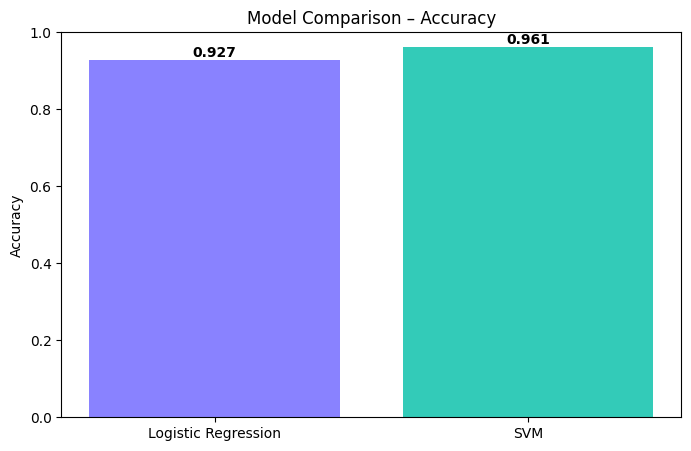

In [64]:
plt.figure(figsize=(8,5))
plt.bar(results_df["Model"], results_df["Accuracy"], color=["#6C63FF","#00BFA6"], alpha=0.8)
plt.title("Model Comparison – Accuracy")
plt.ylabel("Accuracy")
plt.ylim(0,1)
for i, v in enumerate(results_df["Accuracy"]):
    plt.text(i, v+0.01, f"{v:.3f}", ha='center', fontweight='bold')
plt.show()


Detailed Reports

In [65]:
print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_logreg, digits=3))
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))

print("\n=== SVM ===")
print(classification_report(y_test, y_pred_svm, digits=3))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))


=== Logistic Regression ===
              precision    recall  f1-score   support

    Negative      0.696     0.823     0.754       237
     Neutral      0.414     0.702     0.520       181
    Positive      0.987     0.944     0.965      3832

    accuracy                          0.927      4250
   macro avg      0.699     0.823     0.747      4250
weighted avg      0.947     0.927     0.934      4250

Accuracy: 0.9268235294117647

=== SVM ===
              precision    recall  f1-score   support

    Negative      0.856     0.755     0.803       237
     Neutral      0.699     0.602     0.647       181
    Positive      0.977     0.990     0.984      3832

    accuracy                          0.961      4250
   macro avg      0.844     0.783     0.811      4250
weighted avg      0.958     0.961     0.959      4250

Accuracy: 0.9607058823529412


Saving a CSV

In [35]:
import pandas as pd
from joblib import load

IN_CSV  = "final_reviews_app_data.csv"   # your input data
TEXTCOL = "reviews.text"                 # adjust if different

LOGREG_PATH = "baseline_tfidf_weighted.joblib"
SVM_PATH    = "svm_tfidf_weighted.joblib"

OUT_COMBINED = "with_preds_logreg_svm.csv"
OUT_ONLY     = "preds_only_logreg_svm.csv"

# 1) Load data and models
df = pd.read_csv(IN_CSV)
X  = df[TEXTCOL].fillna("")

pipe_logreg = load(LOGREG_PATH)
pipe_svm    = load(SVM_PATH)

# 2) Predictions
df["sentiment_pred_logreg"] = pipe_logreg.predict(X)
df["sentiment_pred_svm"]    = pipe_svm.predict(X)

# (Optional) Probabilities for Logistic Regression (SVM with LinearSVC has no predict_proba)
if hasattr(pipe_logreg[-1], "predict_proba"):
    proba = pipe_logreg.predict_proba(X)
    classes = list(pipe_logreg[-1].classes_)  # e.g. ['Negative','Neutral','Positive']
    for i, c in enumerate(classes):
        df[f"logreg_proba_{c}"] = proba[:, i]

# 3) Save combined CSV
df.to_csv(OUT_COMBINED, index=False)

# 4) Also a compact predictions-only CSV
id_cols = [c for c in ["id","asins","display_name","name","brand",
                       "meta_category","meta_category_label"] if c in df.columns]
proba_cols = [c for c in df.columns if c.startswith("logreg_proba_")]
preds_only = df[id_cols + ["sentiment_pred_logreg","sentiment_pred_svm"] + proba_cols]
preds_only.to_csv(OUT_ONLY, index=False)

print(f"Saved:\n- {OUT_COMBINED}\n- {OUT_ONLY}")

Saved:
- with_preds_logreg_svm.csv
- preds_only_logreg_svm.csv
